# Importing Libraries and Dataset

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error,r2_score
 
import warnings
warnings.filterwarnings('ignore')

In [2]:
WD=pd.read_csv('Wine_Quality_Data.csv')

In [3]:
print(WD.head())

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2 

# Exploratory Data Analysis

In this step we explore our data and analyse it to discover patterns and anomalies in the data. If anomalies and errors are detected they can be removed from the data set using various methods.

In [4]:
WD.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [5]:
WD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
WD.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [7]:
WD.shape

(6497, 13)

In [8]:
dub_wine=WD.copy()
dub_wine.drop_duplicates(subset=None,inplace=True)

In [9]:
dub_wine.shape

(5320, 13)

The change in shape indicates the presence of duplicate values in the dataset, as repetative values are unnecessary we can remove them using drop_duplicates().

We can now assign the non-duplicate data to the original dataset

In [10]:
WD=dub_wine

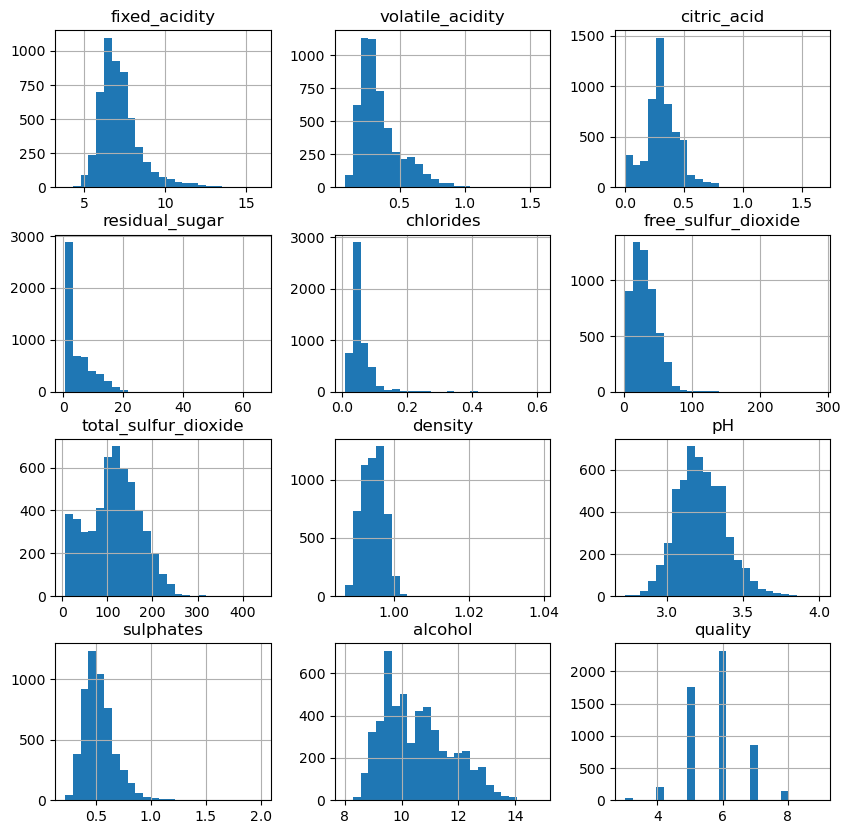

In [11]:
WD.hist(bins=25, figsize=(10, 10))
plt.show()

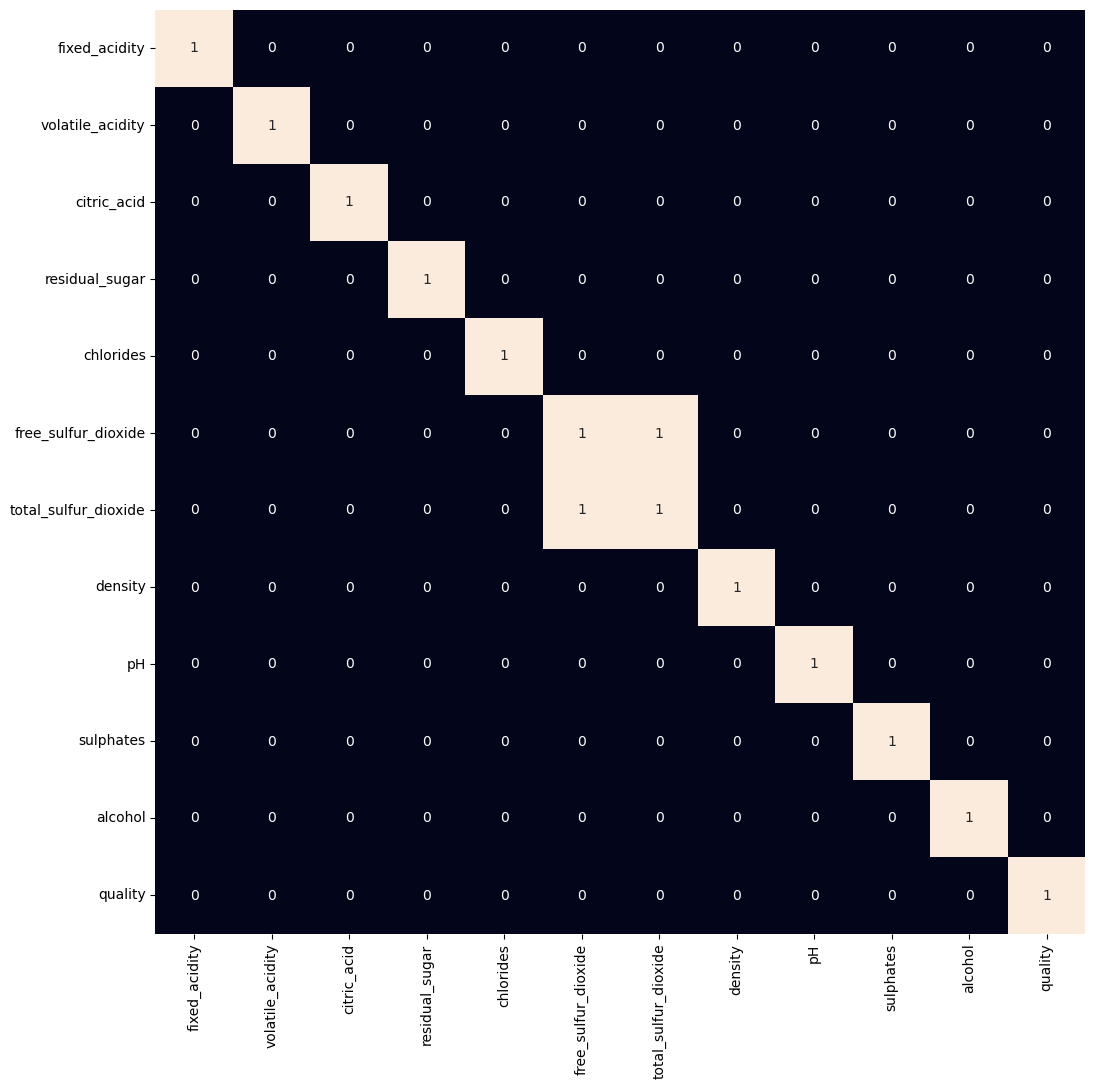

In [12]:
plt.figure(figsize=(12, 12))
sns.heatmap(WD.corr() > 0.7, annot=True, cbar=False)
plt.show()

In [13]:
WD = WD.drop('total_sulfur_dioxide', axis=1)

# Model Development

In [14]:
WD['best quality'] = [1 if x > 5 else 0 for x in WD.quality]
WD.replace({'white': 1, 'red': 0}, inplace=True)


In [15]:

features = WD.drop(['quality', 'best quality'], axis=1)
target = WD['best quality']
 
x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=3)
 
x_train.shape, x_test.shape

((4256, 11), (1064, 11))

In [16]:
# fitting linear regression to training data
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [17]:
train_pred = regressor.predict(x_train)
print(train_pred)
test_pred = regressor.predict(x_test) 
print(test_pred)

[0.72835785 0.33000652 0.53966381 ... 0.23285403 0.39535941 0.50608616]
[0.63650237 0.65213588 0.82255061 ... 0.4716806  0.70906579 0.94272051]


In [18]:
# calculating rmse
train_rmse = mean_squared_error(train_pred, y_train) ** 0.5
print(train_rmse)
test_rmse = mean_squared_error(test_pred, y_test) ** 0.5
print(test_rmse)
# rounding off the predicted values for test set
predicted_data = np.round_(test_pred)
print(predicted_data)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

0.4176145284544319
0.4183731606645909
[1. 1. 1. ... 0. 1. 1.]
Mean Absolute Error: 0.3562481907033823
Mean Squared Error: 0.17503610156447957
Root Mean Squared Error: 0.4183731606645909
